# GRIP Task 4: To Explore Decision Tree Algorithm

# By Sayani Roy

## Problem: 
###  To create the Decision Tree classifier and visualize it graphically for the given ‘Iris’ dataset, so that if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Importing the Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [101]:
iris = pd.read_csv("C:/Users/Shelly/Downloads/iris.csv", index_col=0)

In [102]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


## Summarising the Dataframe

In [104]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## Checking the Summary Statistics

In [105]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Viewing the Labels in "Species"

In [106]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Checking the number of Observations for each Species

In [107]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Checking for Null Values

In [108]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Checking the Dimensions of the dataframe

In [109]:
iris.shape

(150, 5)

## Boxplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C54B64148>,
      dtype=object)

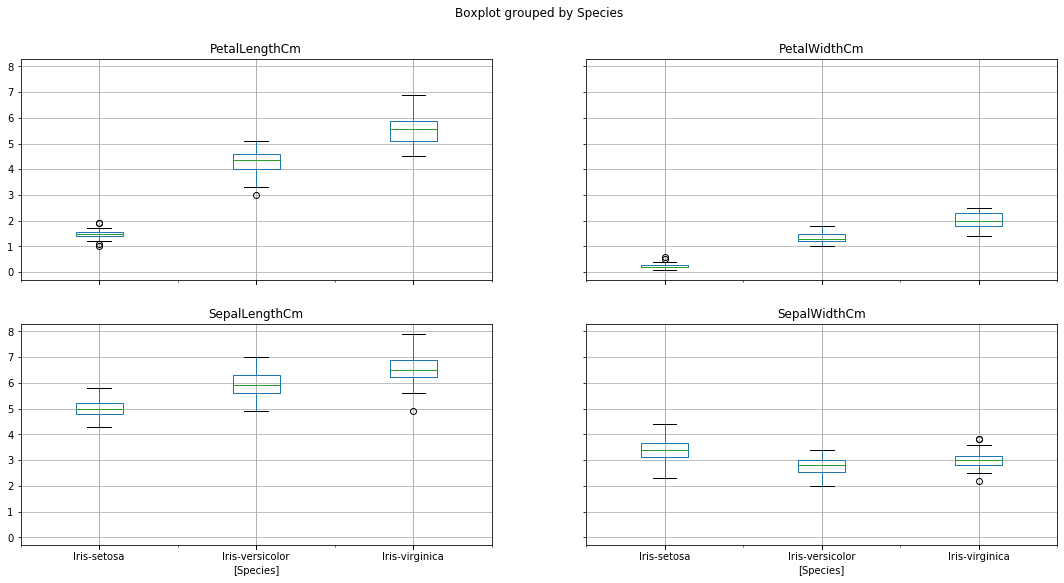

In [110]:
iris.boxplot(by="Species", figsize=(18,9))

## Preparing the Data

In [111]:
x = iris.drop("Species",axis=1)
y = iris["Species"]

## Splitting the Dataset into Training and Test sets

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)

In [113]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Decision Tree Model:

## Defining the Decision Tree Algorithm

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

print('Decision Tree Classifer created')

Decision Tree Classifer created


In [115]:
y_pred=dtree.predict(x_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


## Comparing Actual vs Predicted

In [116]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
Id,,
115,Iris-virginica,Iris-virginica
63,Iris-versicolor,Iris-versicolor
34,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa


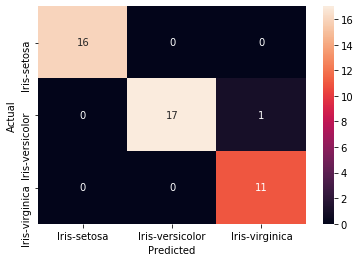

In [117]:
crosstab=pd.crosstab(df['Actual'],df['Predicted'])
sns.heatmap(crosstab, annot=True)

## Checking Accuracy for the Classifier

In [118]:
dtree.score(x_test, y_test)

0.9777777777777777

#### The classification on the Test set is 97.8% accurate

## Visualising the Tree - on the Test Set

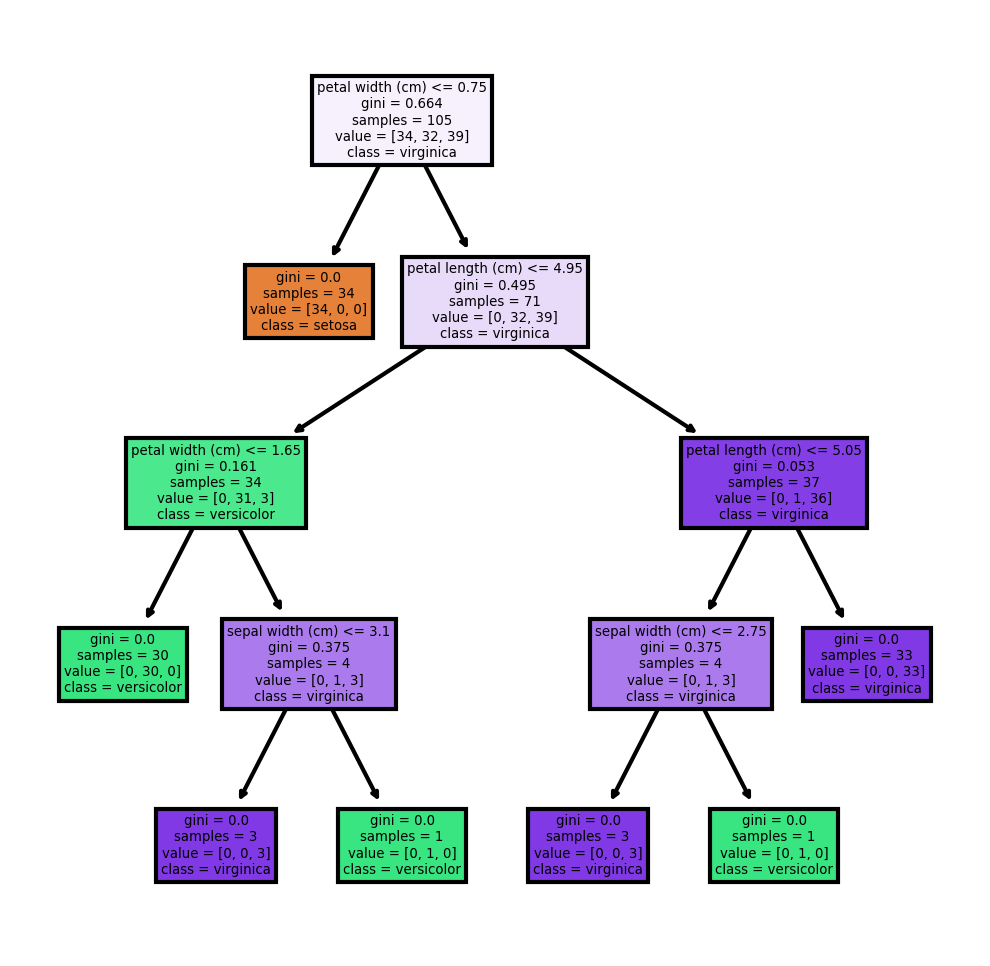

In [119]:
from sklearn import tree
features=['sepal length (cm)', 'sepal width (cm)' , 'petal length (cm)', 'petal width (cm)']
classes=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree, 
               feature_names = features,
               class_names= classes,
               filled = True);

## Testing the Model on a Sample

In [120]:
predicted_species = dtree.predict([[4.7, 3.2, 1.3, 0.2]])
print("Actual species of a flower with measurements 4.7, 3.2, 1.3, 0.2 is Iris-setosa")
print("Predicted species of a flower with measurements 4.7, 3.2, 1.3, 0.2 is", predicted_species)

Actual species of a flower with measurements 4.7, 3.2, 1.3, 0.2 is Iris-setosa
Predicted species of a flower with measurements 4.7, 3.2, 1.3, 0.2 is ['Iris-setosa']


## Applying the Decision Tree Algorithm on the entire Dataset

In [121]:
dtree2 = DecisionTreeClassifier()
dtree2.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

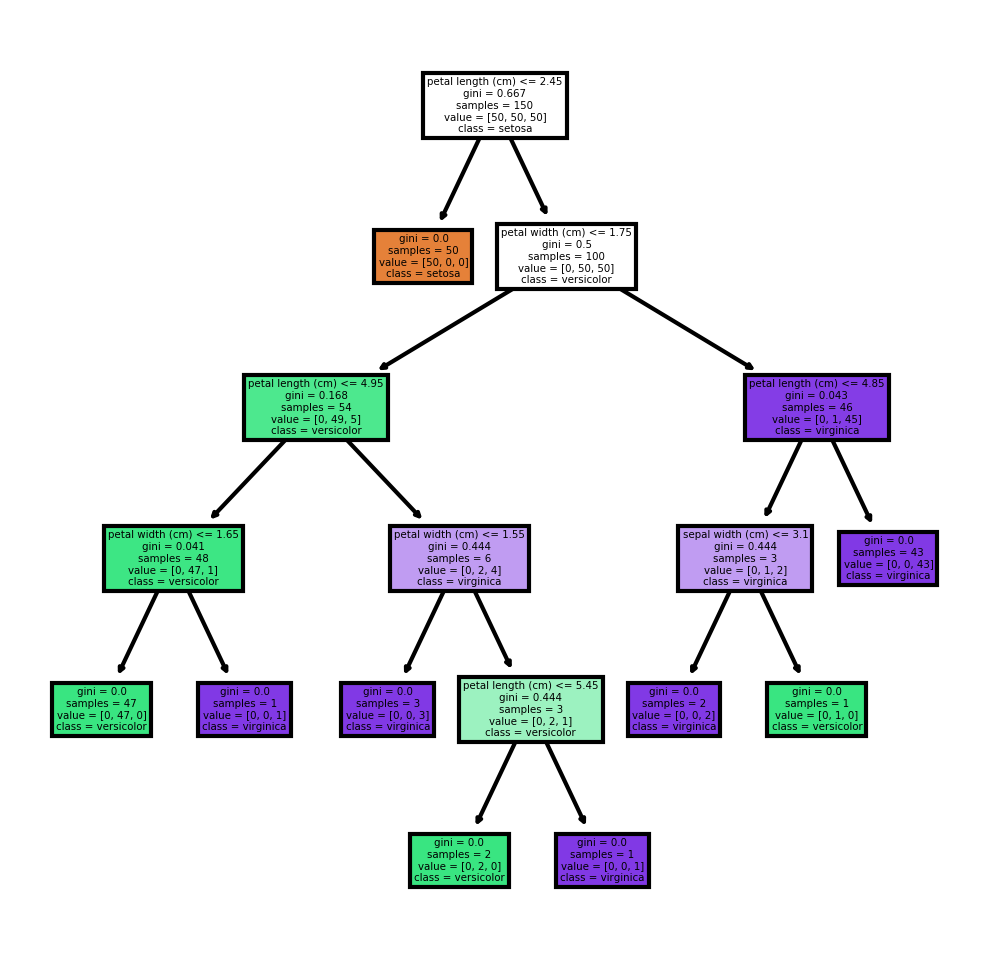

In [122]:
features=['sepal length (cm)', 'sepal width (cm)' , 'petal length (cm)', 'petal width (cm)']
classes=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree2, 
               feature_names = features,
               class_names= classes,
               filled = True);

## Predicting Species based on Custom Data

In [123]:
predicted_species2 = dtree2.predict([[6.4, 3.2, 1.6, 0.4]])
print("Predicted species of a flower with measurements 6.4, 3.2, 1.6, 0.4", predicted_species2)

Predicted species of a flower with measurements 6.4, 3.2, 1.6, 0.4 ['Iris-setosa']
